Importamos Librerías

In [ ]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Verificar el contenido de la carpeta
json_folder_path = '/content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Meta-Data'
files = os.listdir(json_folder_path)
print(files)

['11.json', '7.json', '4.json', '1.json', '5.json', '2.json', '10.json', '3.json', '6.json', '8.json', '9.json']


In [ ]:
import pandas as pd
import os

# Ruta de la carpeta que contiene los archivos JSON
json_folder_path = '/content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Meta-Data'

# Ruta de la carpeta donde se guardarán los archivos Parquet
parquet_folder_path = '/content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet'

# Verificar si la carpeta de destino existe, si no, crearla
if not os.path.exists(parquet_folder_path):
    os.makedirs(parquet_folder_path)

# Filtrar solo archivos JSON en la carpeta
json_files = [f for f in os.listdir(json_folder_path) if f.endswith('.json')]

# Convertir cada archivo JSON a Parquet
for json_file in json_files:
    json_file_path = f'{json_folder_path}/{json_file}'

    try:
        # Cargar el archivo JSON con formato línea por línea (si es necesario)
        df = pd.read_json(json_file_path, lines=True)

        # Crear el nombre para el archivo Parquet en la carpeta de destino
        parquet_file_path = f'{parquet_folder_path}/{json_file.replace(".json", ".parquet")}'

        # Guardar el DataFrame en formato Parquet
        df.to_parquet(parquet_file_path, engine='pyarrow')

        print(f'Convertido {json_file} a {parquet_file_path}')
    except ValueError as e:
        print(f'Error procesando {json_file}: {e}')



Convertido 11.json a /content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet/11.parquet
Convertido 7.json a /content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet/7.parquet
Convertido 4.json a /content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet/4.parquet
Convertido 1.json a /content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet/1.parquet
Convertido 5.json a /content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet/5.parquet
Convertido 2.json a /content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet/2.parquet
Convertido 10.json a /content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet/10.parquet
Convertido 3.json a /content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet/3.parquet
Convertido 6.json a /content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet/6.parquet
Convertido 8.json a /content/driv

In [ ]:
import pandas as pd
import os

# Ruta de la carpeta que contiene los archivos Parquet
parquet_folder_path = '/content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet'

# Filtrar solo archivos Parquet en la carpeta
parquet_files = [f for f in os.listdir(parquet_folder_path) if f.endswith('.parquet')]

# Crear una lista para almacenar los DataFrames
dataframes = []

# Leer y agregar cada archivo Parquet a la lista
for parquet_file in parquet_files:
    parquet_file_path = f'{parquet_folder_path}/{parquet_file}'
    df = pd.read_parquet(parquet_file_path)
    dataframes.append(df)

# Combinar todos los DataFrames en uno solo
df_combined = pd.concat(dataframes, ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(df_combined.head())

                                 name  \
0                     Porter Pharmacy   
1                      Mcguinns store   
2               Gentle Hands Grooming   
3  Smokecignals Electronic Cigarettes   
4     Advanced Home Medical Equipment   

                                             address  \
0  Porter Pharmacy, 129 N Second St, Cochran, GA ...   
1   Mcguinns store, 4884 NC-9, Mill Spring, NC 28756   
2  Gentle Hands Grooming, 156 US-176, Saluda, NC ...   
3  Smokecignals Electronic Cigarettes, 2108 W Tho...   
4  Advanced Home Medical Equipment, 885 Franklin ...   

                                 gmap_id description   latitude  longitude  \
0  0x88f16e41928ff687:0x883dad4fd048e8f8        None  32.388300 -83.357100   
1  0x88575f0654bd7c03:0xca3e467f7e766ad5        None  35.359437 -82.179693   
2  0x8859db7fe56d01c7:0xf90f3bdb3c62ba47        None  35.236050 -82.351049   
3  0x862722f489700e87:0x62c847c188bd5aa9        None  30.501326 -90.484117   
4  0x88523ca20145acc7:0x4b

In [ ]:
print(df_combined.describe())

           latitude     longitude    avg_rating  num_of_reviews
count  3.025011e+06  3.025011e+06  3.025011e+06    3.025011e+06
mean   3.743011e+01 -9.234178e+01  4.303736e+00    4.362911e+01
std    5.424919e+00  1.635686e+01  7.127077e-01    1.429952e+02
min   -4.092931e+01 -1.788071e+02  1.000000e+00    1.000000e+00
25%    3.371032e+01 -9.926497e+01  4.000000e+00    7.000000e+00
50%    3.827949e+01 -8.760035e+01  4.500000e+00    1.700000e+01
75%    4.129169e+01 -8.029520e+01  4.800000e+00    4.300000e+01
max    8.785652e+01  1.800000e+02  5.000000e+00    9.998000e+03


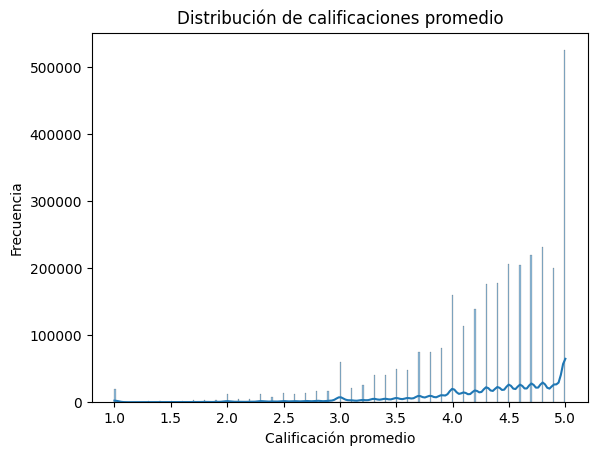

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_combined['avg_rating'].dropna(), kde=True)
plt.title('Distribución de calificaciones promedio')
plt.xlabel('Calificación promedio')
plt.ylabel('Frecuencia')
plt.show()

Se puede observar en el gráfico de "Distribución de calificaciones promedio" que la mayor parte de las calificaciones se concentran entre 4.0 y 5.0, con un aumento significativo hacia el extremo superior, especialmente en la calificación de 5.0, que tiene la mayor frecuencia. Esto indica que muchos de los establecimientos tienden a recibir calificaciones muy altas, lo que puede ser un reflejo de un buen servicio o satisfacción generalizada de los clientes. Las calificaciones por debajo de 3.0 son mucho menos comunes, lo que sugiere que pocos locales obtienen evaluaciones muy bajas. En general, parece que los usuarios están bastante satisfechos con los locales analizados.

# **Categorías que tiene**

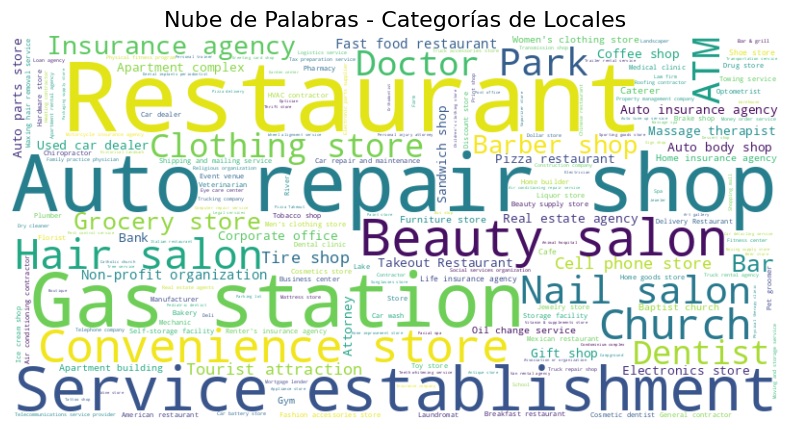

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ruta de la carpeta que contiene los archivos Parquet
parquet_folder_path = '/content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet'

# Función para cargar y combinar todos los archivos Parquet en un solo DataFrame
def combinar_parquet_files(parquet_folder):
    # Listar los archivos Parquet en la carpeta
    parquet_files = [f for f in os.listdir(parquet_folder) if f.endswith('.parquet')]

    # Cargar y combinar todos los archivos Parquet
    dataframes = []
    for parquet_file in parquet_files:
        file_path = os.path.join(parquet_folder, parquet_file)
        df = pd.read_parquet(file_path)
        dataframes.append(df)

    # Concatenar todos los DataFrames en uno solo
    combined_df = pd.concat(dataframes, ignore_index=True)

    return combined_df

# Combinar los archivos Parquet
combined_df = combinar_parquet_files(parquet_folder_path)

# Asegúrate de que la columna 'category' esté presente
if 'category' in combined_df.columns:
    # Aplanar las listas en la columna "category"
    combined_df_exploded = combined_df.explode('category')

    # Contar la cantidad de locales por categoría
    category_counts = combined_df_exploded['category'].value_counts()

    # Crear un diccionario para la nube de palabras
    category_dict = category_counts.to_dict()

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_dict)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Eliminar los ejes
    plt.title("Nube de Palabras - Categorías de Locales", fontsize=16)
    plt.show()
else:
    print("La columna 'category' no está presente en el DataFrame combinado.")

Acá podemos ver las categorías de locales comerciales y de servicios. Las palabras más destacadas, debido a su mayor tamaño, son "Establecimiento de servicios", "Restaurante", "Salón de belleza", "Tienda de conveniencia", "Taller de reparación de automóviles", "Iglesia", y "Gasolinera". ", lo que sugiere que estas son las categorías más comunes o relevantes en el análisis. Otros tipos de negocios como "Peluquería", "Farmacia", "Dentista" y "ATM" también están presentes, aunque en menor proporción.

In [ ]:
print(df_combined.columns)

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')


# **Tipo de Restaurant**

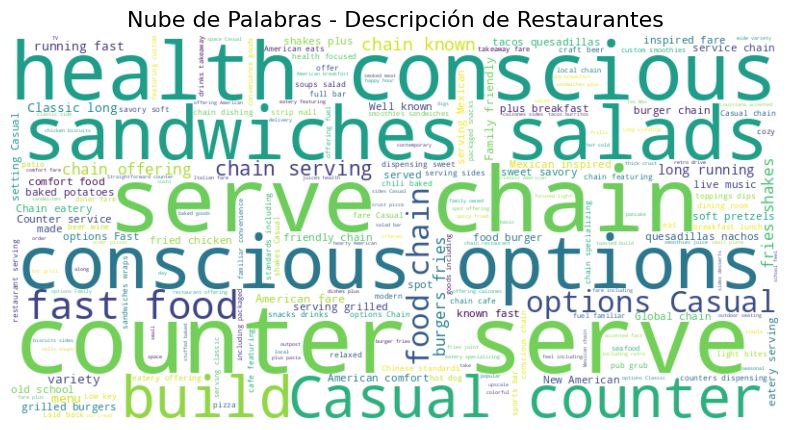

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Asegúrate de que los datos estén cargados
if df_combined is not None:
    # Aplanar las listas en la columna "category"
    df_combined_exploded = df_combined.explode('category')

    # Filtrar los registros que tienen la categoría 'Restaurant'
    restaurant_df = df_combined_exploded[df_combined_exploded['category'] == 'Restaurant']

    # Verificar si hay descripciones disponibles
    if not restaurant_df['description'].dropna().empty:
        # Unir las descripciones en un solo texto para la nube de palabras
        text_for_wordcloud = ' '.join(restaurant_df['description'].dropna().astype(str))

        # Crear la nube de palabras
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

        # Mostrar la nube de palabras
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Eliminar los ejes
        plt.title("Nube de Palabras - Descripción de Restaurantes", fontsize=16)
        plt.show()
    else:
        print("No se encontraron descripciones para la categoría 'Restaurant'.")
else:
    print("Los datos no están cargados.")

Se pude ver los tipos de restaurantes. Las palabras más destacadas, como "serve", "chain", "counter", "health cious", "sandwiches", "ensaladas", y "build", indican que los conceptos más destacados están relacionados con restaurantes de autoservicio, cadenas de comida rápida y opciones saludables. Términos como "ensaladas" y "sándwiches" sugieren que estos tipos de comidas son populares en este contexto. Además, palabras como "health consciente" reflejan una tendencia hacia opciones más saludables en los menús. En general, la nube de palabras ofrece una representación de los tipos de restaurantes y servicios que son comunes, con énfasis en comidas rápidas y saludables.

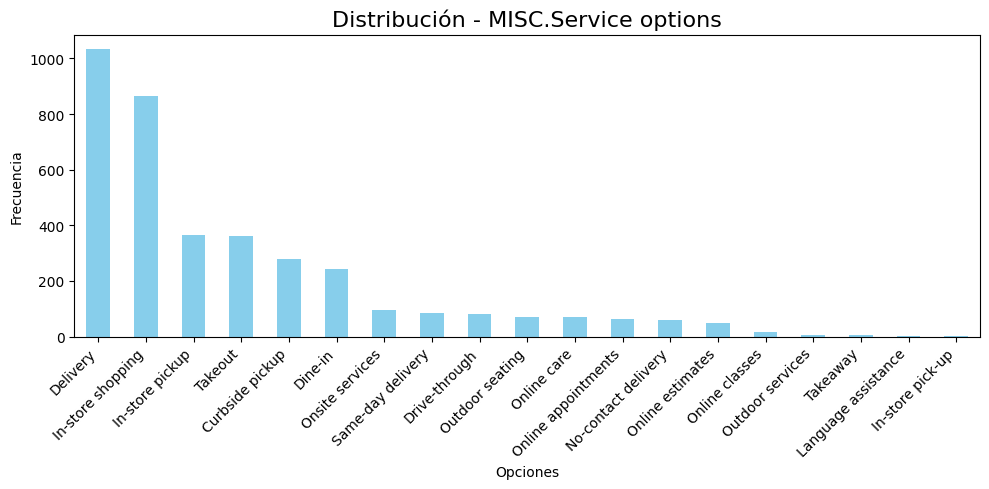

In [ ]:
# Carpeta donde están los archivos Parquet
parquet_folder = '/content/drive/MyDrive/1- Henry /1- Proyecto final - EDA - META-DATA/Parquet'

# Función para cargar y combinar todos los archivos Parquet en un solo DataFrame
def combinar_parquet_files(parquet_folder):
    parquet_files = [f for f in os.listdir(parquet_folder) if f.endswith('.parquet')]
    dataframes = []
    for parquet_file in parquet_files:
        file_path = os.path.join(parquet_folder, parquet_file)
        df = pd.read_parquet(file_path)
        dataframes.append(df)
    combinado_df = pd.concat(dataframes, ignore_index=True)
    return combinado_df

# Función para crear gráficos de barras o nubes de palabras para cada columna
def graficar_misc_columna(df, columna):
    # Filtrar valores nulos
    df_columna = df[columna].dropna()

    # Aplanar las listas (en caso de que los valores estén en listas)
    df_columna = df_columna.explode()

    # Contar las ocurrencias de cada opción
    value_counts = df_columna.value_counts()

    # Si la columna tiene muchas opciones, generamos una nube de palabras
    if len(value_counts) > 20:
        # Crear una nube de palabras
        text_for_wordcloud = ' '.join(df_columna.astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

        # Mostrar la nube de palabras
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Nube de Palabras - {columna}", fontsize=16)
        plt.show()

    # Si la columna tiene menos opciones, generamos un gráfico de barras
    else:
        plt.figure(figsize=(10, 5))
        value_counts.plot(kind='bar', color='skyblue')
        plt.title(f"Distribución - {columna}", fontsize=16)
        plt.xlabel('Opciones')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Cargar y combinar los 6 lotes
combinado_df = combinar_parquet_files(parquet_folder)

# Columna 'MISC.Service options'
graficar_misc_columna(combinado_df, 'MISC.Service options')


Las opciones de servicio más comunes son Delivery (Entrega a domicilio), con más de 1000 menciones. Compras en tienda , con aproximadamente 800 menciones. Retiradas en el comercio y Takeout (Comida para llevar), ambas con frecuencias altas. Curbside pickup (Recogida en la acera) y Dine-in (Cena en el lugar) también destacan, aunque con menor frecuencia. Las opciones menos mencionadas incluyen, Entrega sin contacto, y Asientos al aire libre, entre otras. Los servicios más utilizados son aquellos relacionados con la entrega y la compra en tienda, mientras que los servicios en línea o sin contacto son menos frecuentes.

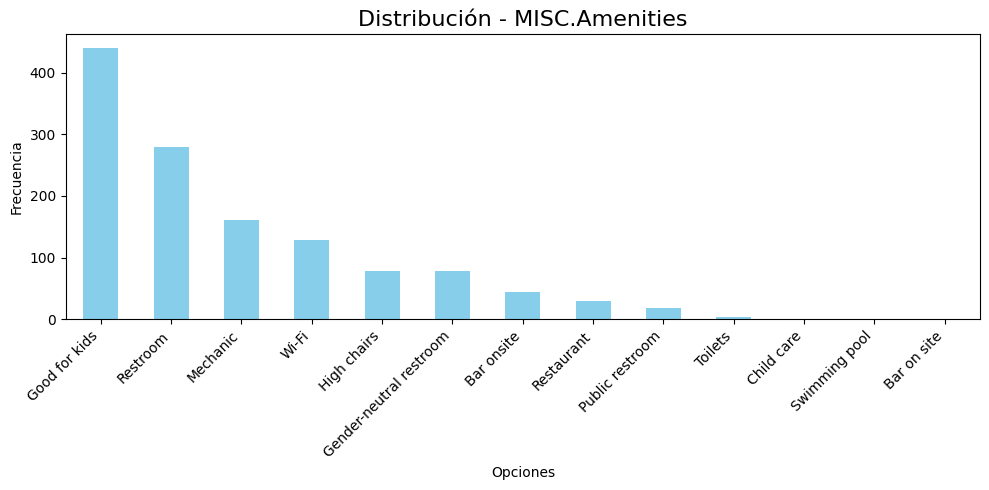

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Amenities')

Podemos notar que el servicio más ofrecido es "Good for kids" (Bueno para niños), con una frecuencia destacada, seguido de "Restroom" (Baño) y "Mechanic" (Mecánico) . Esto indica que muchos establecimientos priorizan la comodidad para familias y el acceso a servicios esenciales como baños y ayuda mecánica. Las opciones como "Wi-Fi" también son comunes, mientras que otras comodidades, como "Piscina" (Piscina) o "Bar en el lugar" (Bar en el lugar), son menos frecuentes. Esto sugiere que los servicios básicos y orientados a familias son los más ofrecidos en estos lugares.

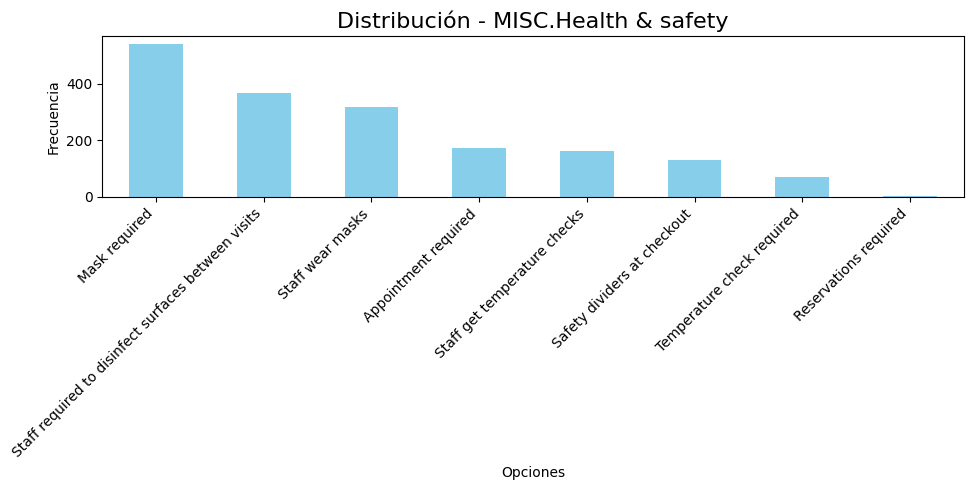

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Health & safety')

En este grafico podesmos concluir que la mayoría de los negocios priorizan medidas básicas de salud y seguridad para proteger tanto a los clientes como al personal.

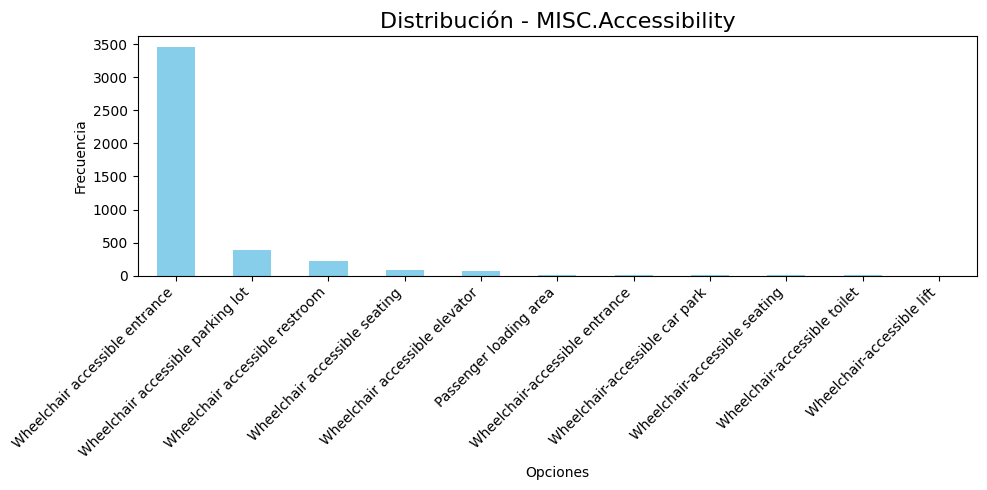

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Accessibility')

Se puede observar que la opción más común es "Wheelchair-accessible Entry" (Entrada accesible para sillas de ruedas), con una frecuencia significativamente mayor en comparación con el resto de las opciones. Otras opciones como "Estacionamiento accesible para sillas de ruedas" (Estacionamiento accesible para sillas de ruedas) y "Baño accesible para sillas de ruedas" (Baño accesible para sillas de ruedas) tienen una frecuencia mucho menor, aunque aún relevante. El resto de las opciones como elevadores, áreas de carga y otras facilidades accesibles son poco comunes. Esto sugiere que la mayoría de los establecimientos priorizan la entrada accesible, pero otros aspectos de accesibilidad son menos frecuentes.

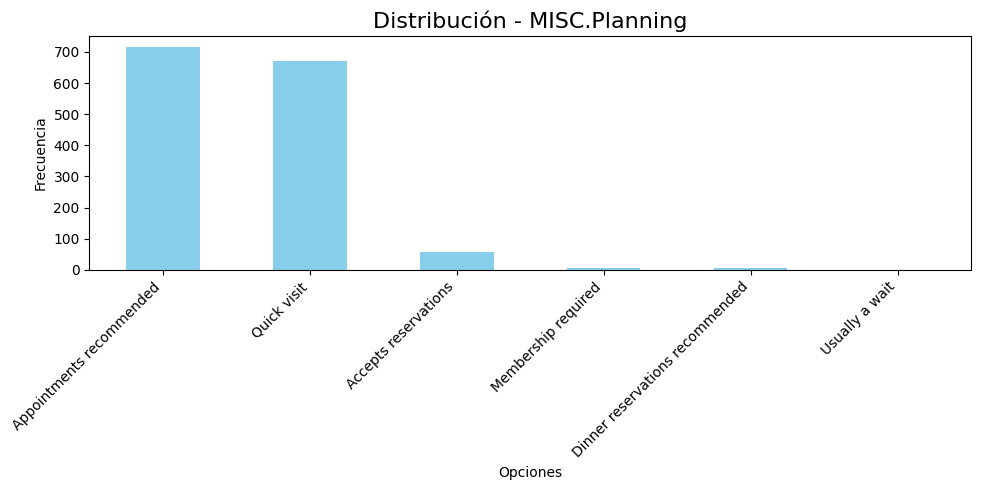

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Planning')

Los lugares analizados favorecen la rapidez y flexibilidad en la planificación, mientras que aspectos como las reservas formales o membresías son menos relevantes.

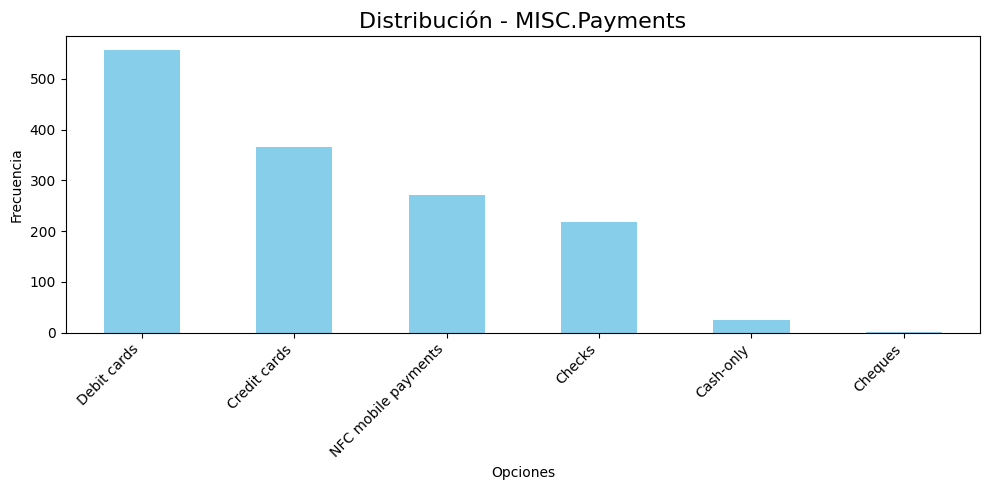

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Payments')

Las formas de pago más comunes son "Debit cards" (Tarjetas de débito) y "Credit cards" (Tarjetas de crédito), con una frecuencia notable mayor. Los pagos mediante "Pagos móviles NFC" y "Cheques" también son utilizados, pero en menor medida. "Solo efectivo" y "Cheques" son las opciones menos frecuentes. Esto sugiere que la mayoría de los establecimientos prefieren métodos de pago electrónicos, con un uso muy reducido del efectivo o cheques.

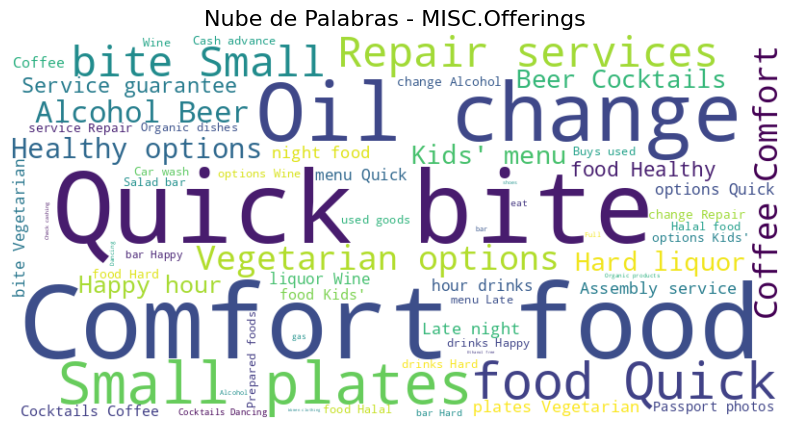

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Offerings')

Los términos más destacados son "Quick Bite" (Bocado rápido), "Comfort food" (Comida reconfortante), "Oil change" (Cambio de aceite), y " Platos pequeños" (Platos pequeños). Esto sugiere que los servicios más comunes en los establecimientos incluyen opciones rápidas de comida, servicios de reparación y una variedad de alimentos reconfortantes y pequeños bocados. También aparecen otras ofertas como "Repair Services" (Servicios de reparación), "Alcohol" (Alcohol), y "Vegetarian options" (Opciones vegetarianas), indicando una diversidad de servicios ofrecidos.

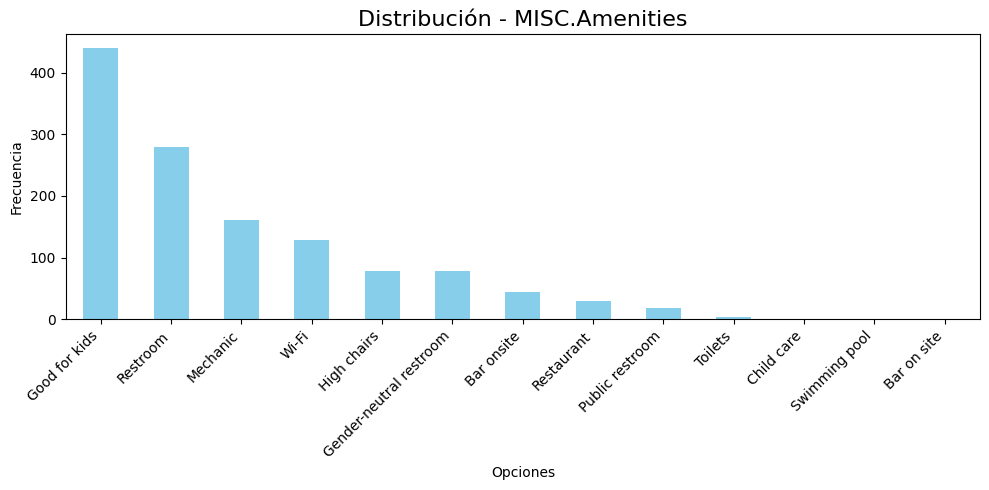

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Amenities')

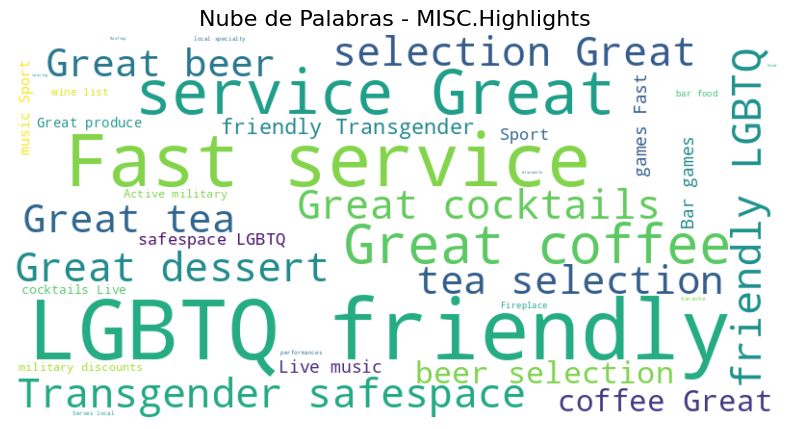

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Highlights')

Al analizar la nube de palabras "MISC.Highlights", vemos que destacan términos como "LGBTQ amigable" (Amigable con la comunidad LGBTQ), "Fast service" (Servicio rápido), y "Great café" (Café excelente). Estos términos indican que muchos establecimientos se enfocan en brindar un ambiente inclusivo, con un enfoque en la velocidad del servicio y la calidad del café. Además, palabras como "Great beer" (Cerveza excelente) y "Great cocktails" (Cócteles excelentes) resaltan la oferta de bebidas, mientras que "Transgender safespace" (Espacio seguro para personas transgénero) subrayan un enfoque en la segura

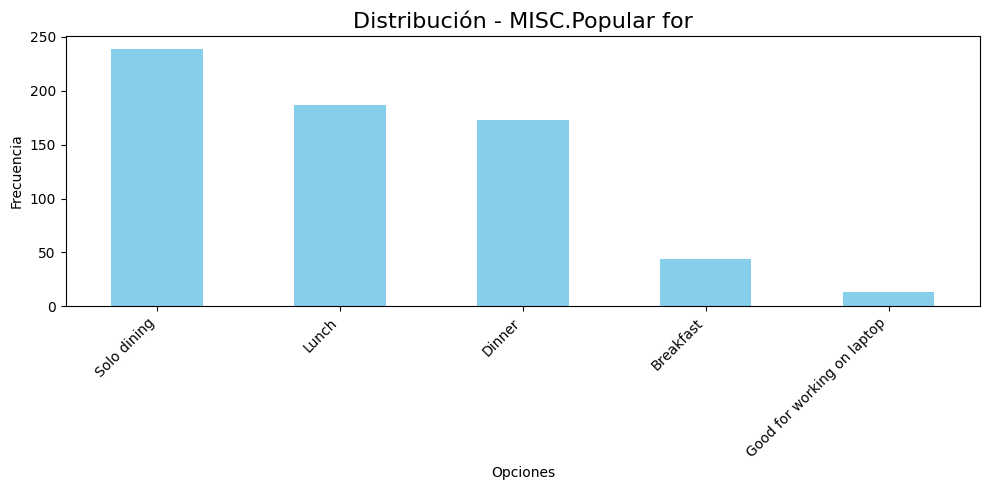

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Popular for')

Podemos observar que las categorías más frecuentes son "Solo Dining" (Comer solo), "Lunch" (Almuerzo) y "Dinner" (Cena). Esto indica que estos establecimientos son preferidos principalmente para comidas individuales y en horarios de almuerzo y cena. En comparación, "Breakfast" (Desayuno) y "Good for work on laptop" (Bueno para trabajar con una laptop) son mucho menos comunes, lo que sugiere que los clientes no acuden tanto a estos lugares para desayunar o trabajar. En general, los datos reflejan una tendencia hacia las comidas individuales y rápidas.

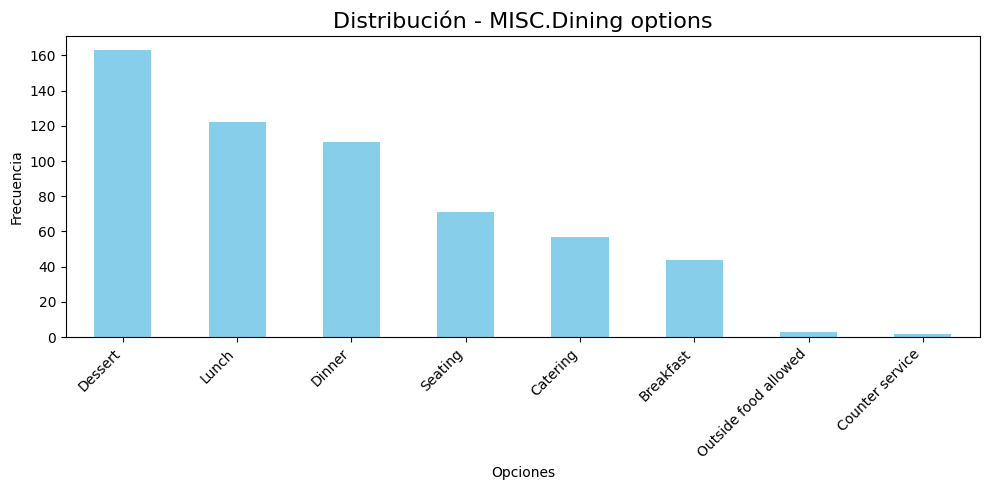

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Dining options')

 Se puede ver que la opción más frecuente es "Dessert" (Postre), seguida de "Lunch" (Almuerzo) y "Dinner" (Cena), lo que indica una fuerte preferencia. por opciones de postres y comidas principales en estos establecimientos. Otras opciones como "Seating" (Asientos) y "Catering" también tienen una presencia considerable, mientras que opciones como "Outside food permitido" (Se permite comida de afuera) y "Counter service" (Servicio de mostrador) son las menos comunes. Esto sugiere que los clientes buscan principalmente comidas completas y postres en un ambiente cómodo, con servicios adicionales como catering.


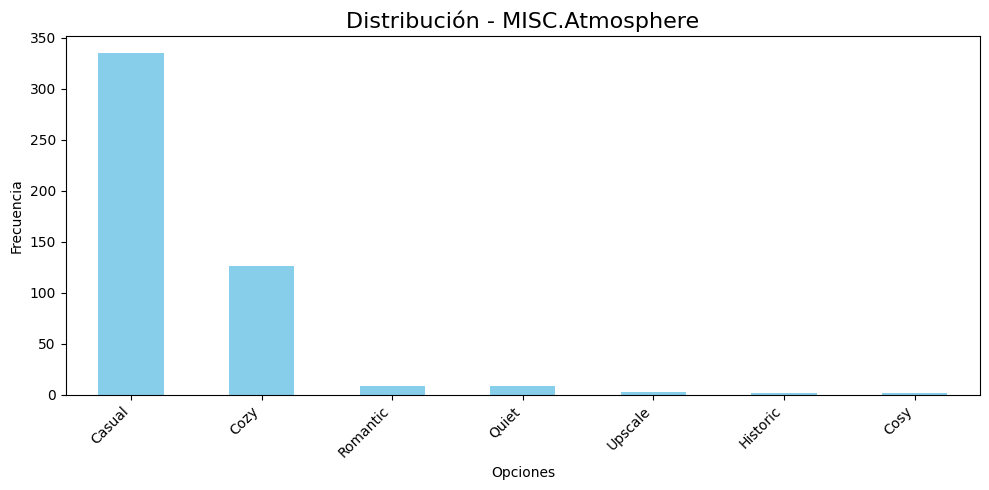

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Atmosphere')

Poemos observar que la opción "Casual" (Informal) es, por mucho, la más frecuente, seguida por "Cozy" (Acogedor). Esto resalta una clara preferencia por ambientes relajados y cómodos en la mayoría de los establecimientos. Las opciones como "Romantic" (Romántico), "Quiet" (Tranquilo), y otras categorías como "Upscale" (De lujo) o "Histórico" (Histórico) tienen una presencia muy baja, lo que indica que estos tipos de ambientes no son tan comunes en comparación con el ambiente casual y acogedor que predomina en los locales.

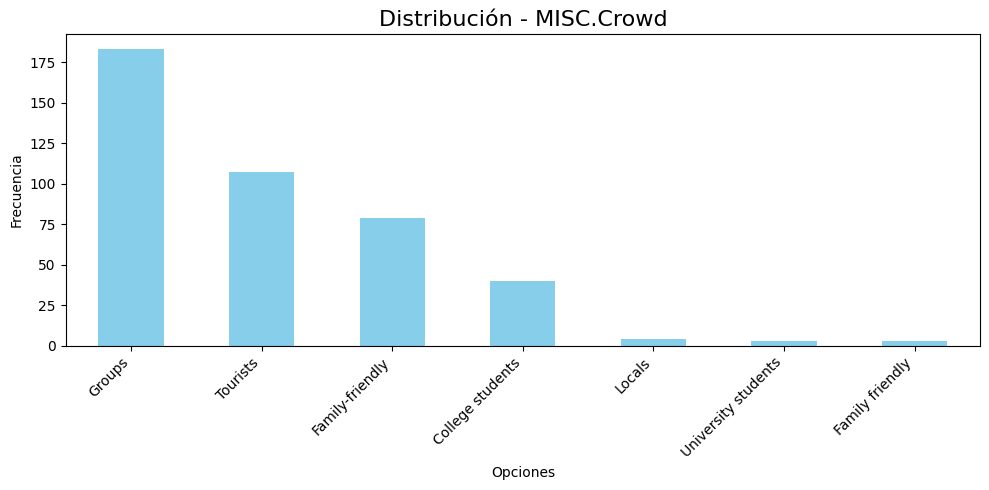

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Crowd')

Se puede observa que las categorías más frecuentes son "Groups" (Grupos) y "Tourists" (Turistas), lo que sugiere que estos establecimientos son populares entre grandes grupos de personas y turistas. Otras categorías como "Family-friendly" (Amigable para familias) y "College Students" (Estudiantes universitarios) también tienen una presencia considerable, pero son menos frecuentes en comparación. Las categorías "Locals" (Locales) y "University Students" (Estudiantes universitarios) tienen una baja frecuencia, lo que indica que estos lugares no son tan frecuentados por residentes locales o estudiantes universitarios en compa.

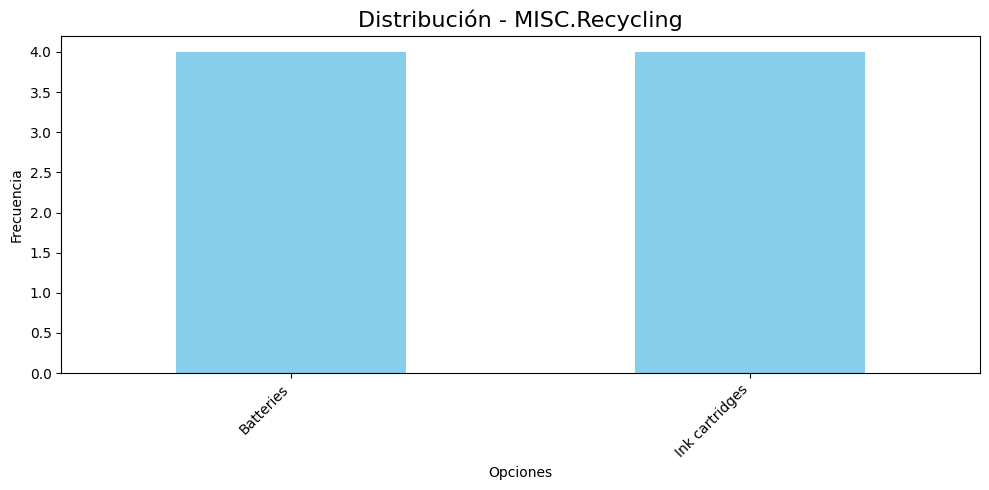

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.Recycling')

Al observar el gráfico "Distribución - MISC.Recycling", se nota que las dos opciones presentadas, "Batteries" (Baterías) y "Ink cartuchos" (Cartuchos de tinta), tienen la misma frecuencia. Esto indica que los establecimientos analizados brindan servicios de reciclaje tanto para baterías como para cartuchos de tinta en la misma medida. Aunque la frecuencia es baja en comparación con otros gráficos anteriores, muestra un compromiso con el reciclaje de estos productos.

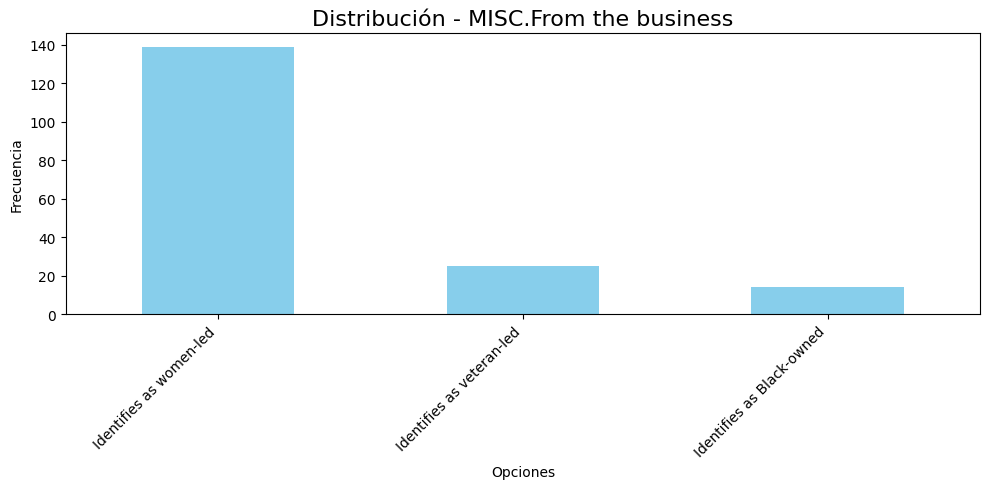

In [ ]:
graficar_misc_columna(combinado_df, 'MISC.From the business')

 Se puede observar que la categoría más frecuente es "Identified as women-led" (Identificado como dirigido por mujeres), lo que sugiere que una gran cantidad de los negocios analizados son liderados por mujeres. Otras categorías, como "Identifies as veteran-led" (Identificado como dirigido por veteranos) y "Identifies as Black-owned" (Identificado como propiedad de personas afrodescendientes), tienen una presencia significativamente menor. Esto refleja que, aunque hay diversidad en la propiedad y el liderazgo de los negocios, la mayoría se identifican como liderados por mujeres.